# Determining the biggest diagonal of masks from Detectron output on C3S-only dataset

## Dependencies

Common libraries

In [ ]:
import math
import numpy as np
import cv2 as cv
import os
from datetime import datetime
from google.colab.patches import cv2_imshow

Install Detectron2 computer vision framework

In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-6rrga4er
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-6rrga4er
  Resolved https://github.com/facebookresearch/detectron2.git to commit 94113be6e12db36b8c7601e13747587f19ec92fe
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filena

Import Detectron2 libraries

In [ ]:
# DATA SET PREPARATION AND LOADING
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog

# VISUALIZATION
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode

# CONFIGURATION
from detectron2 import model_zoo
from detectron2.config import get_cfg

# EVALUATION
from detectron2.engine import DefaultPredictor

Clone repository with important files

In [ ]:
!git clone 'https://github.com/la-zu-li/PCA-on-Semantic-Segmentation-with-Detectron2'

Get only important files from the repository

In [1]:
!mv 'PCA-on-Semantic-Segmentation-with-Detectron2/pytorch' .
!rm -r 'PCA-on-Semantic-Segmentation-with-Detectron2'

mv: invalid option -- 'r'
Try 'mv --help' for more information.


## Dataset

Download from Roboflow

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="sDHrdDWd5USqSBR0E7on")
project = rf.workspace("medusas").project("alitas-tcc_h")
dataset = project.version(11).download("coco")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=26129f83b444d71017227e29e14caeef85d041c358f900a9e4e61fc807c44730
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
   

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Alitas---TCC_H-11 in coco:: 100%|██████████| 130/130 [00:00<00:00, 641.38it/s]


In [ ]:
DATA_SET_NAME = dataset.name.replace(" ", "-")
DATA_SET_LOCATION = dataset.location
ANNOTATIONS_FILE_NAME = "_annotations.coco.json"

Dataset preprocessing (apply bilateral filter)

In [ ]:
def preprocess_coco_dataset(dataset_path, quiet=False):
    BILATERAL_PARAMETERS = (2, 52, 84)

    if not quiet:
        print(f"Preprocessing data on: {dataset_path}")

    img_filenames = os.listdir(dataset_path)
    img_filenames.remove("_annotations.coco.json")

    for filename in img_filenames:
        if not quiet:
            print(f"Applying Bilateral Filter on {filename}")
        try:
            img = cv.imread(os.path.join(dataset_path, filename))
            img = cv.bilateralFilter(img, *BILATERAL_PARAMETERS)
            cv.imwrite(os.path.join(dataset_path, filename))
        except:
            pass

    if not quiet:
        print(f"Data preprocessed successfully on {dataset_path}")


datasets_paths = [os.path.join(DATA_SET_LOCATION, 'train'),
                 os.path.join(DATA_SET_LOCATION, 'test'),
                 os.path.join(DATA_SET_LOCATION, 'valid'),]

for dataset in datasets_paths:
    preprocess_coco_dataset(dataset)

Preprocessing data on: /content/Alitas---TCC_H-11/train
Applying Bilateral Filter on splited_81_bmp.rf.c3e105458285d2880e6c42922b8dea50.jpg
Applying Bilateral Filter on splited_150_bmp.rf.ed4e7bdc7c4803d05322f4255957a735.jpg
Applying Bilateral Filter on splited_11_bmp.rf.5471083b94c0685e6b166f139cbe21fe.jpg
Applying Bilateral Filter on splited_130_bmp.rf.7f57913c233babd31f32bc5c105d0396.jpg
Applying Bilateral Filter on splited_141_bmp.rf.0b9079acc197f4c1d19ba1dfc6290e2f.jpg
Applying Bilateral Filter on splited_331_bmp.rf.9435f2fe6523b932c06006a0c1e23936.jpg
Applying Bilateral Filter on splited_121_bmp.rf.a0ee9ef956a83f80854ae50608270856.jpg
Applying Bilateral Filter on splited_50_bmp.rf.93657f51bb6dbc97324efab449bbf836.jpg
Applying Bilateral Filter on splited_110_bmp.rf.9fce2c79fd0ddd611950e453d79178e5.jpg
Applying Bilateral Filter on splited_111_bmp.rf.46c8cb0f3f3758cd0158d72dfdd0c176.jpg
Applying Bilateral Filter on splited_00_bmp.rf.47864d681699a6109ada36f43a5275b2.jpg
Applying Bila

Prepare dataset for inference

In [ ]:
# TEST SET
TEST_DATA_SET_NAME = f"{DATA_SET_NAME}-test"
TEST_DATA_SET_IMAGES_DIR_PATH = os.path.join(DATA_SET_LOCATION, "test")
TEST_DATA_SET_ANN_FILE_PATH = os.path.join(DATA_SET_LOCATION, "test", ANNOTATIONS_FILE_NAME)

register_coco_instances(
    name=TEST_DATA_SET_NAME,
    metadata={},
    json_file=TEST_DATA_SET_ANN_FILE_PATH,
    image_root=TEST_DATA_SET_IMAGES_DIR_PATH
)

## Network

### Configure network for inference

Set output directory

In [ ]:
OUTPUT_DIR_PATH = os.path.join(
    "output",
    datetime.now().strftime('%Y-%m-%d-%H-%M-%S')
)

os.makedirs(OUTPUT_DIR_PATH, exist_ok=True)

Set specific configuration for inference

In [ ]:
ARCHITECTURE = "mask_rcnn_R_101_FPN_3x"
CONFIG_FILE_PATH = f"COCO-InstanceSegmentation/{ARCHITECTURE}.yaml"
NUM_CLASSES = 3

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(CONFIG_FILE_PATH))
cfg.DATASETS.TEST = (TEST_DATA_SET_NAME,)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.INPUT.MASK_FORMAT='bitmask'
cfg.MODEL.ROI_HEADS.NUM_CLASSES = NUM_CLASSES
cfg.OUTPUT_DIR = OUTPUT_DIR_PATH
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7

### Load weights for inference

Set pre-trained weights path

In [ ]:
PRE_TRAINED_WEIGHTS_PATH = os.path.join(
    "pytorch/",
    DATA_SET_NAME,
    ARCHITECTURE
)

outputs_all_instances = os.listdir(PRE_TRAINED_WEIGHTS_PATH)

MOST_RECENT_PRE_TRAINED_WEIGHTS_PATH = os.path.join(
    PRE_TRAINED_WEIGHTS_PATH,
    outputs_all_instances[-1],
    "model_final.pth"
)

Load pre-trained weights

In [ ]:
cfg.MODEL.WEIGHTS = MOST_RECENT_PRE_TRAINED_WEIGHTS_PATH
print(f"successfully loaded weights from {MOST_RECENT_PRE_TRAINED_WEIGHTS_PATH}")

successfully loaded weights from drive/MyDrive/pytorch/Alitas---TCC_H/mask_rcnn_R_101_FPN_3x/2023-06-17-17-07-22/model_final.pth


### Predict

Create predictor based on configuration

In [ ]:
predictor = DefaultPredictor(cfg)

perform inference on test dataset with created predictor

In [ ]:
metadata = MetadataCatalog.get(TEST_DATA_SET_NAME)
dataset_test = DatasetCatalog.get(TEST_DATA_SET_NAME)

Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



In [ ]:
predicted_instances = {}

for d in dataset_test:
    img_file_path = d["file_name"]
    img = cv.imread(img_file_path)

    outputs = predictor(img)
    instances = outputs['instances']

    predicted_instances[img_file_path] = instances

    # visualizer = Visualizer(
    #     img[:, :, ::-1],
    #     metadata=metadata,
    #     scale=0.8,
    #     instance_mode=ColorMode.IMAGE_BW
    # )
    # out = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))
    # cv2_imshow(out.get_image()[:, :, ::-1])

torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)


## Measuring

Define measuring function to calculate biggest diagonal using PCA

In [ ]:
from sklearn.decomposition import PCA

def calc_longest_diagonal_pca(contour):

    contour = np.squeeze(contour)

    pca = PCA(n_components=1)
    pca.fit(contour)

    principal_component = pca.components_[0]
    contour_pca = np.dot(contour, principal_component)

    start_index = np.argmin(contour_pca)
    end_index = np.argmax(contour_pca)

    start, end = contour[start_index], contour[end_index]
    start, end = tuple(start), tuple(end)
    length = math.dist(start, end)

    return start, end, length

Calculate longest diagonal with defined function

In [ ]:
diagonals = {}

for (img_file_path, instances) in predicted_instances.items():
    diagonals_of_img_masks = []

    masks = instances.pred_masks.cpu()
    masks_np = masks.numpy()
    for mask in masks_np:
        numerical_mask = mask.astype(np.uint8)
        contours,_ = cv.findContours(numerical_mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
        contour = contours[0]
        diagonal = calc_longest_diagonal_pca(contour)
        diagonals_of_img_masks.append(diagonal)

    diagonals[img_file_path] = diagonals_of_img_masks

Display measured diagonals

diagonal length (px):  95.60334722173695
diagonal length (nm):  79.49418321487428


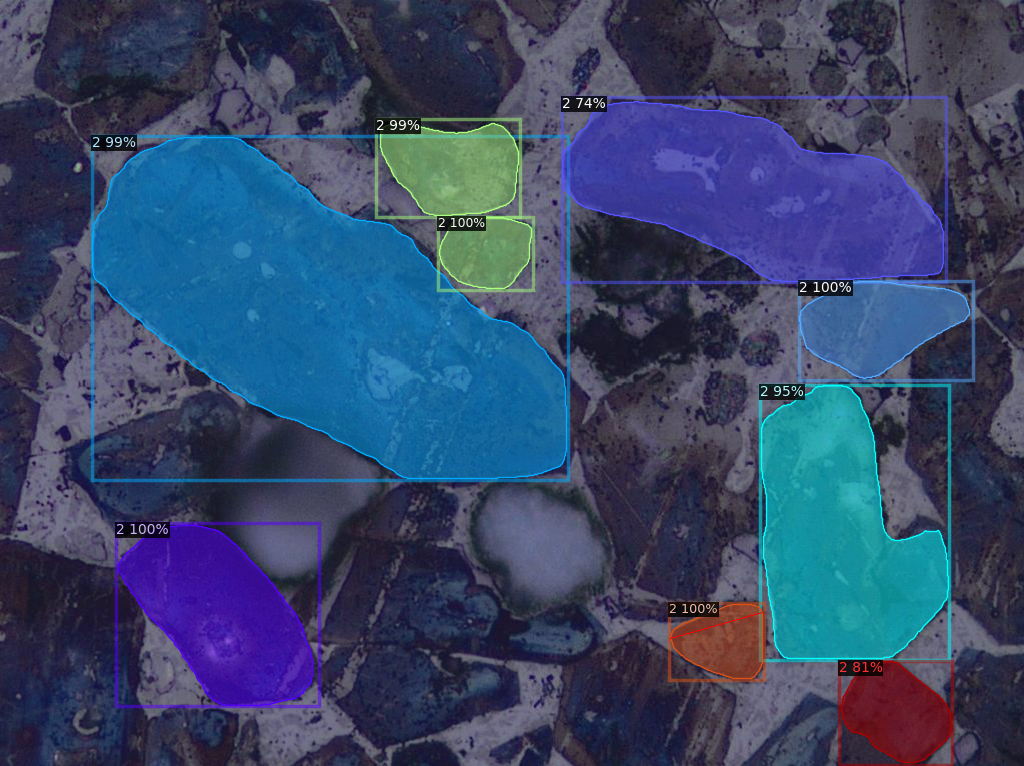

diagonal length (px):  95.88013350011565
diagonal length (nm):  79.72433100534616


In [ ]:
IMAGES_SCALE_PX2NM = 0.8315

def draw_diagonal_on_img(img, diag_start, diag_end, color=(0,0,255)):
    cv.line(img, diag_start, diag_end, color)

for (img_file_path, instances) in predicted_instances.items():

    img = cv.imread(img_file_path)
    visualizer = Visualizer(img[:, :, ::-1])
    img_w_masks = visualizer.draw_instance_predictions(instances.to("cpu"))
    img_w_masks_np = img_w_masks.get_image()[:, :, ::-1]

    diagonals_img = diagonals[img_file_path]

    for start, end, length_pixels in diagonals_img:

        img_w_masks_np_copy = np.array(img_w_masks_np)
        draw_diagonal_on_img(img_w_masks_np_copy, start, end)
        print("diagonal length (px): ", length_pixels)
        length_nanometers = length_pixels * IMAGES_SCALE_PX2NM
        print("diagonal length (nm): ", length_nanometers)

        cv2_imshow(img_w_masks_np_copy)